2.В документации метода k-средних найдите, как модели можно передать начальные центроиды. К прекоду добавьте обучение модели с начальными центроидами, заданными в переменной centers. Выведите на экран:
центроиды кластеров для модели из прошлого задания (уже в прекоде),
центроиды кластеров для модели с начальными центроидами.

In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

data = pd.read_csv('https://code.s3.yandex.net/datasets/segments.csv')
centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

print("Центроиды кластеров:")
print(model.cluster_centers_)

# Обучение модели с начальными центроидами
model =KMeans(n_clusters=3, init=centers, n_init=1, random_state=12345) # < напишите код здесь >
# < напишите код здесь >
model.fit(data)

print("Центроиды кластеров для модели с начальными центроидами:")
print(model.cluster_centers_)

Центроиды кластеров:
[[20.56550497 20.14513373 15.204     ]
 [10.68632155 98.90275017 10.856     ]
 [50.06201472 19.62701512  1.808     ]]
Центроиды кластеров для модели с начальными центроидами:
[[10.68632155 98.90275017 10.856     ]
 [50.06201472 19.62701512  1.808     ]
 [20.56550497 20.14513373 15.204     ]]


В документации метода sklearn.cluster.KMeans найдите атрибут, отвечающий за целевую функцию. Добавьте к коду из предыдущего урока подсчёт этой функции для двух моделей: без начальных центроидов и с ними. Напечатайте на экране значения целевой функции для обеих моделей.

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans


data = pd.read_csv('https://code.s3.yandex.net/datasets/segments.csv')
centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

print("Целевая функция:")
print(model.inertia_)

model = KMeans(n_clusters=3, init=centers, random_state=12345)
model.fit(data)

print("Целевая функция модели с начальными центроидами:")
print(model.inertia_)

Целевая функция:
74253.203635621
Целевая функция модели с начальными центроидами:
74253.203635621


Обучите модель с начальными центроидами centers. Постройте диаграмму pairplot с заливкой по кластерам и центроидами полученных кластеров. Начальные центроиды добавьте отдельным слоем без заливки.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


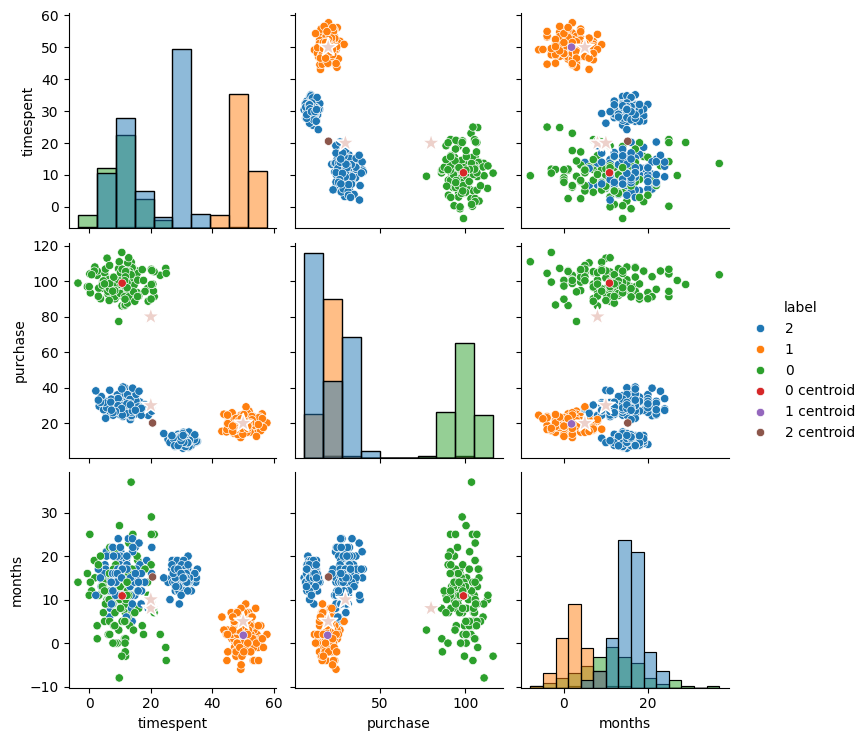

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

data = pd.read_csv('https://code.s3.yandex.net/datasets/segments.csv')
centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

model = KMeans(n_clusters=3, init=centers, random_state=12345)
model.fit(data)
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']
data_all = pd.concat([data, centroids], ignore_index=True)

pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')
# Дополнительный слой для центроидов
# Сформируйте таблицу для дополнительного слоя
centroids_init =centroids_init = pd.DataFrame([[20, 80, 8], [50, 20, 5], [20, 30, 10]], \
                             columns=data.drop(columns=['label']).columns) # < напишите код здесь >
# Сформируйте "заглушку"
centroids_init['label'] = 4
pairgrid.data =centroids_init # < напишите код здесь >
# < напишите код здесь >
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', palette='flag')

Метод локтя
Данные не всегда разделены чётко. Поэтому есть другой способ поиска числа кластеров — метод локтя (англ. elbow method). Своё название получил неслучайно: по форме его график напоминает согнутую в локте руку. Оптимальное количество кластеров определяется условным «локтем». Чтобы построить график метода, нужно составить список из значений целевой функции для разного количества кластеров: от 1 до 10 (реже 20). Для этого обучим модель несколько раз и сохраним значения целевой функции каждой модели в список distortion (англ. «искажение»):

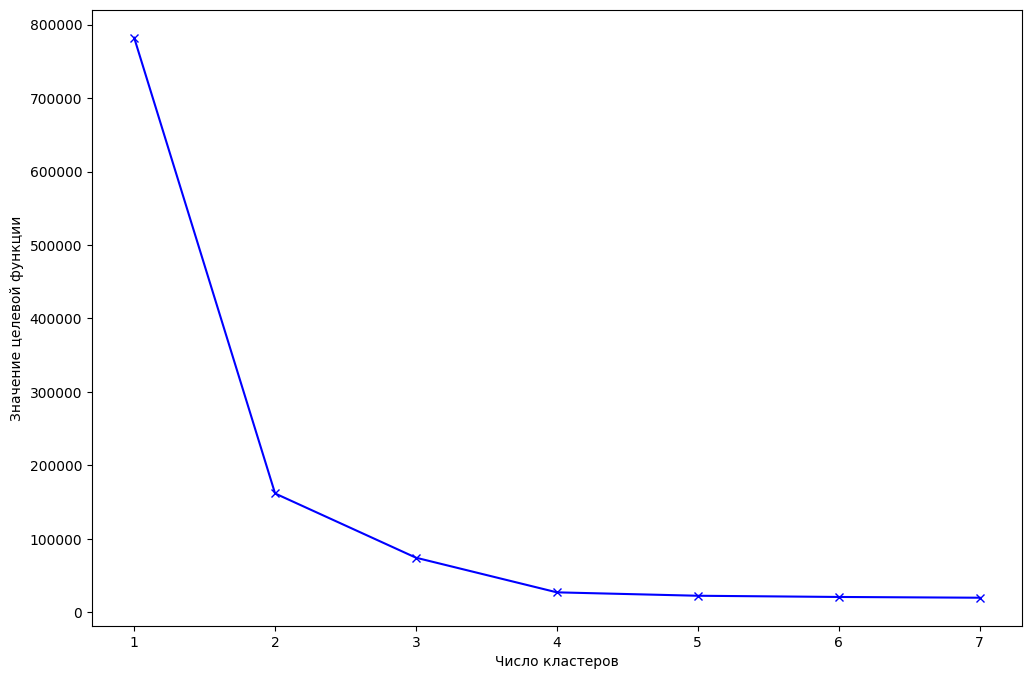

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

data = pd.read_csv('https://code.s3.yandex.net/datasets/segments.csv')
distortion = []
K = range(1, 8)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(data)
    distortion.append(model.inertia_) 


import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show() 

Обучите модель для четырёх кластеров. Центроиды укажите так: ['0 centroid', '1 centroid', '2 centroid', '3 centroid'].  Постройте диаграмму pairplot с полученными центроидами и заливкой для модели. При обучении примените параметр random_state=12345.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


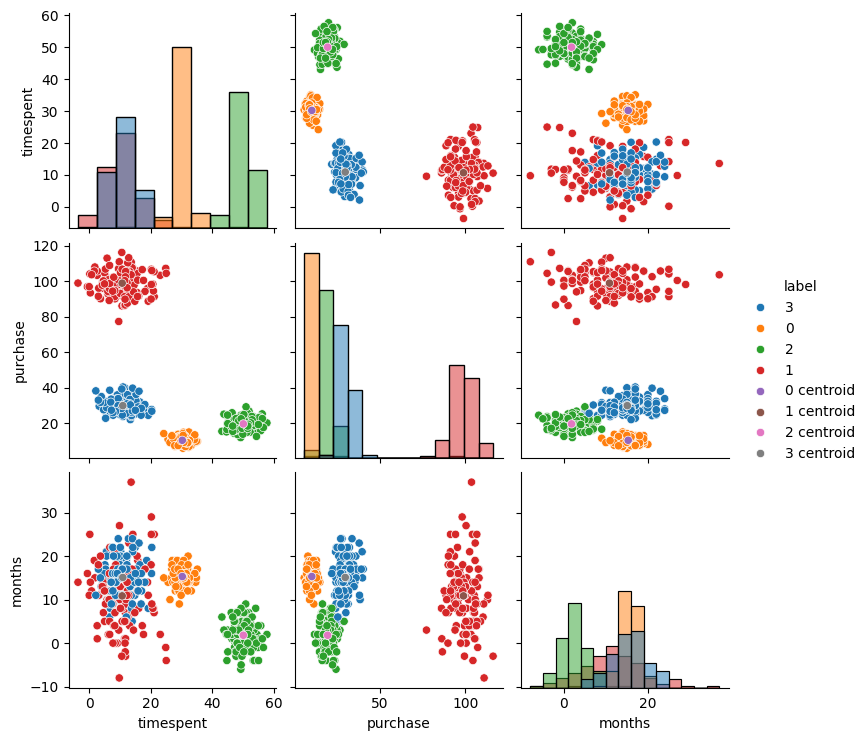

In [9]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

data = pd.read_csv('https://code.s3.yandex.net/datasets/segments.csv')

# Обучение модели для 4-х кластеров
model = KMeans(n_clusters=4, random_state=12345)
model.fit(data)
centroids =pd.DataFrame(model.cluster_centers_, columns=data.columns) # < напишите код здесь >
data['label'] =model.labels_.astype(str) # < напишите код здесь >
centroids['label'] =['0 centroid', '1 centroid', '2 centroid', '3 centroid'] # < напишите код здесь >
data_all = pd.concat([data, centroids], ignore_index=True)

# Построение графика
sns.pairplot(data_all, hue='label', diag_kind='hist')

Постройте график метода локтя для количества кластеров от 1 до 10 включительно. При обучении модели примените параметр random_state=12345. 
Составьте список distortion значений целевой функции для количества кластеров от 1 до 10. При этом используйте параметр random_state=12345.
Для полученных значений целевой функции постройте график метода локтя размером 12 на 8. Ось X назовите «Число кластеров», а ось Y — «Значение целевой функции».

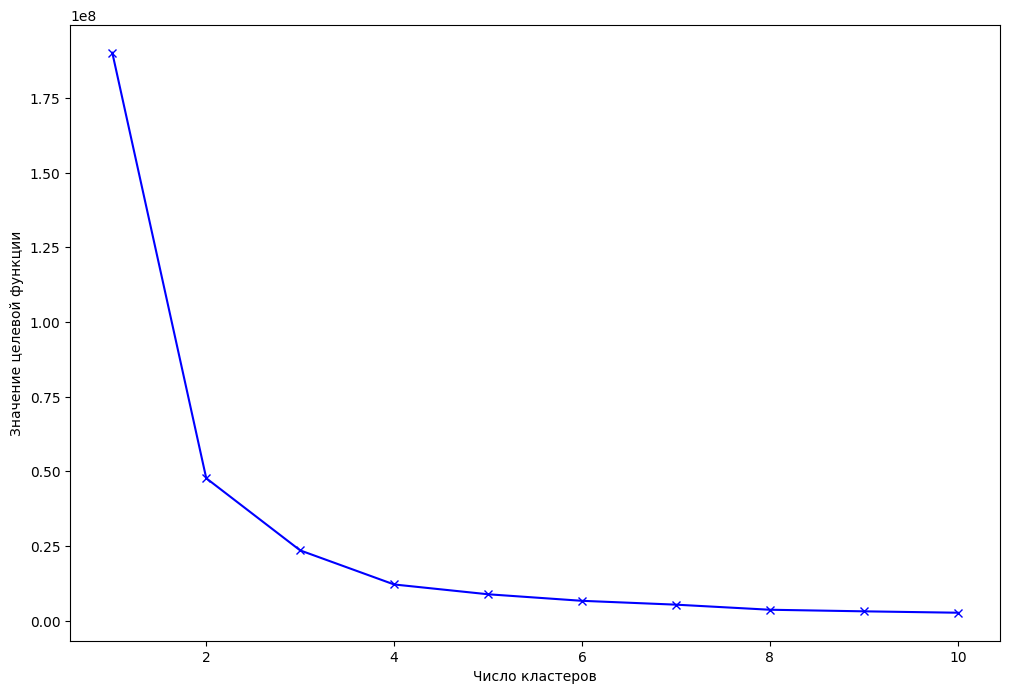

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('https://code.s3.yandex.net/datasets/cars.csv')

# < напишите код здесь >
distortion = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(data)
    distortion.append(model.inertia_)


plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show()

Постройте диаграмму pairplot для модели с тремя кластерами без отмеченных центроидов. При обучении модели примените параметр random_state=12345. 
Из-за особенностей версий seaborn нужно указать список признаков в функции pairplot(): vars=data.columns[:-1]. Последний признак — это номер кластера, его отображать не надо.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


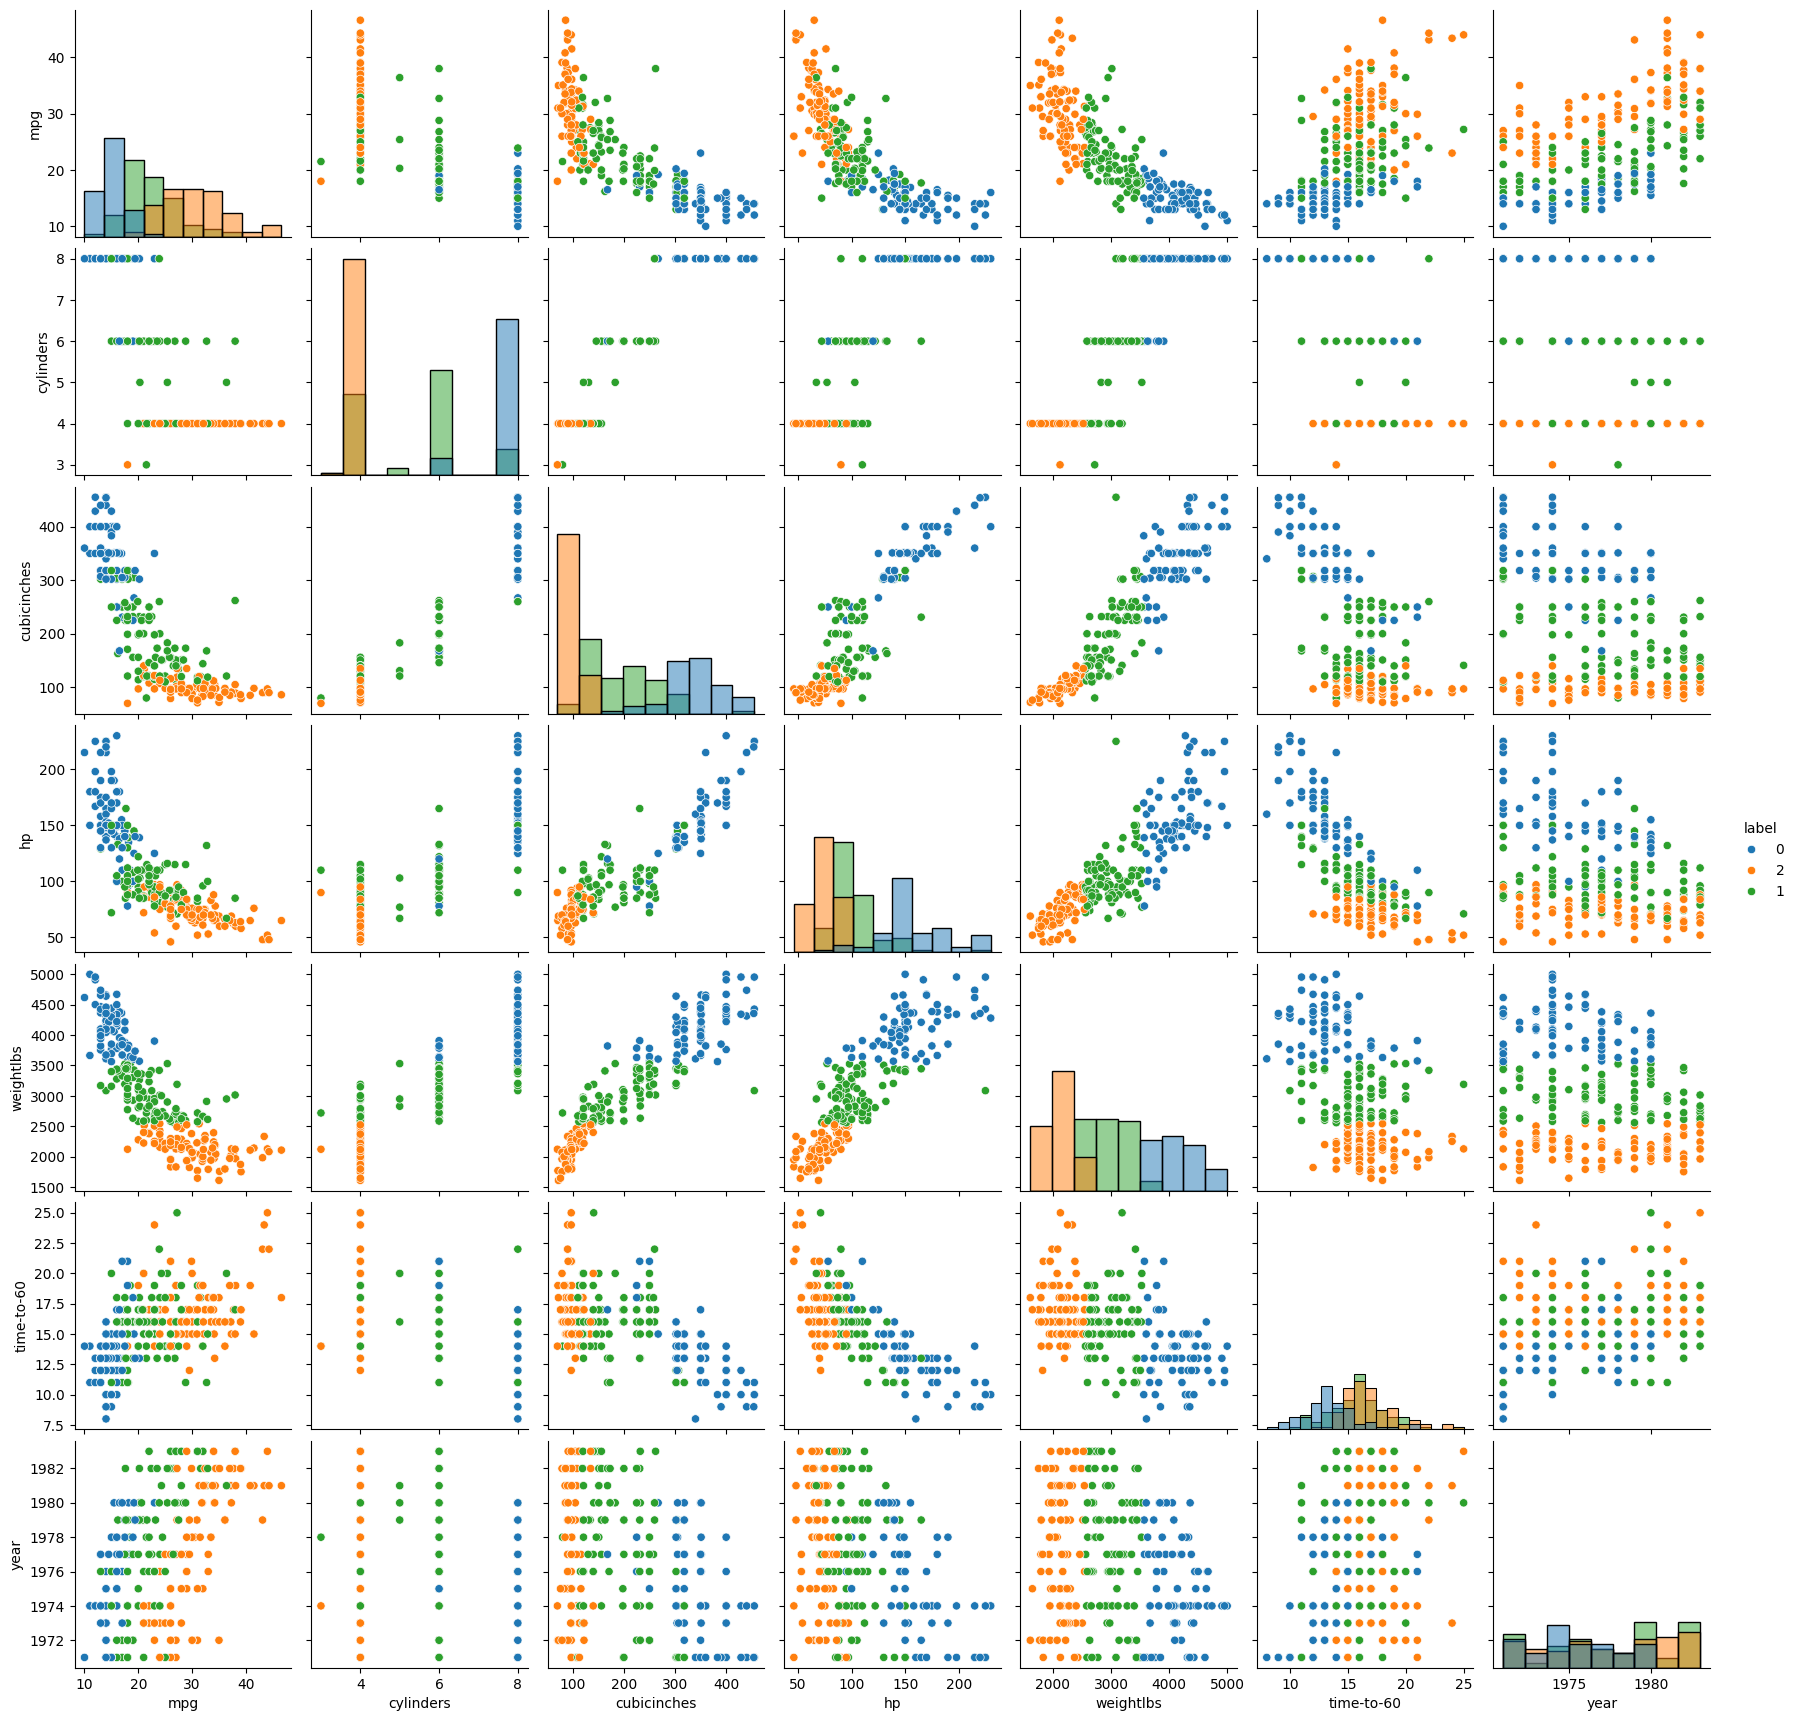

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

data = pd.read_csv('https://code.s3.yandex.net/datasets/cars.csv')

# < напишите код здесь >
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)
data['label'] =model.labels_.astype(str)
sns.pairplot(data, hue='label', vars=data.columns[:-1], diag_kind='hist')

Постройте диаграмму pairplot с заливкой по столбцу brand. Обучите модель с тремя кластерами на данных без столбца brand. Добавьте на график полученные центроиды. При обучении модели примените параметр random_state=12345.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


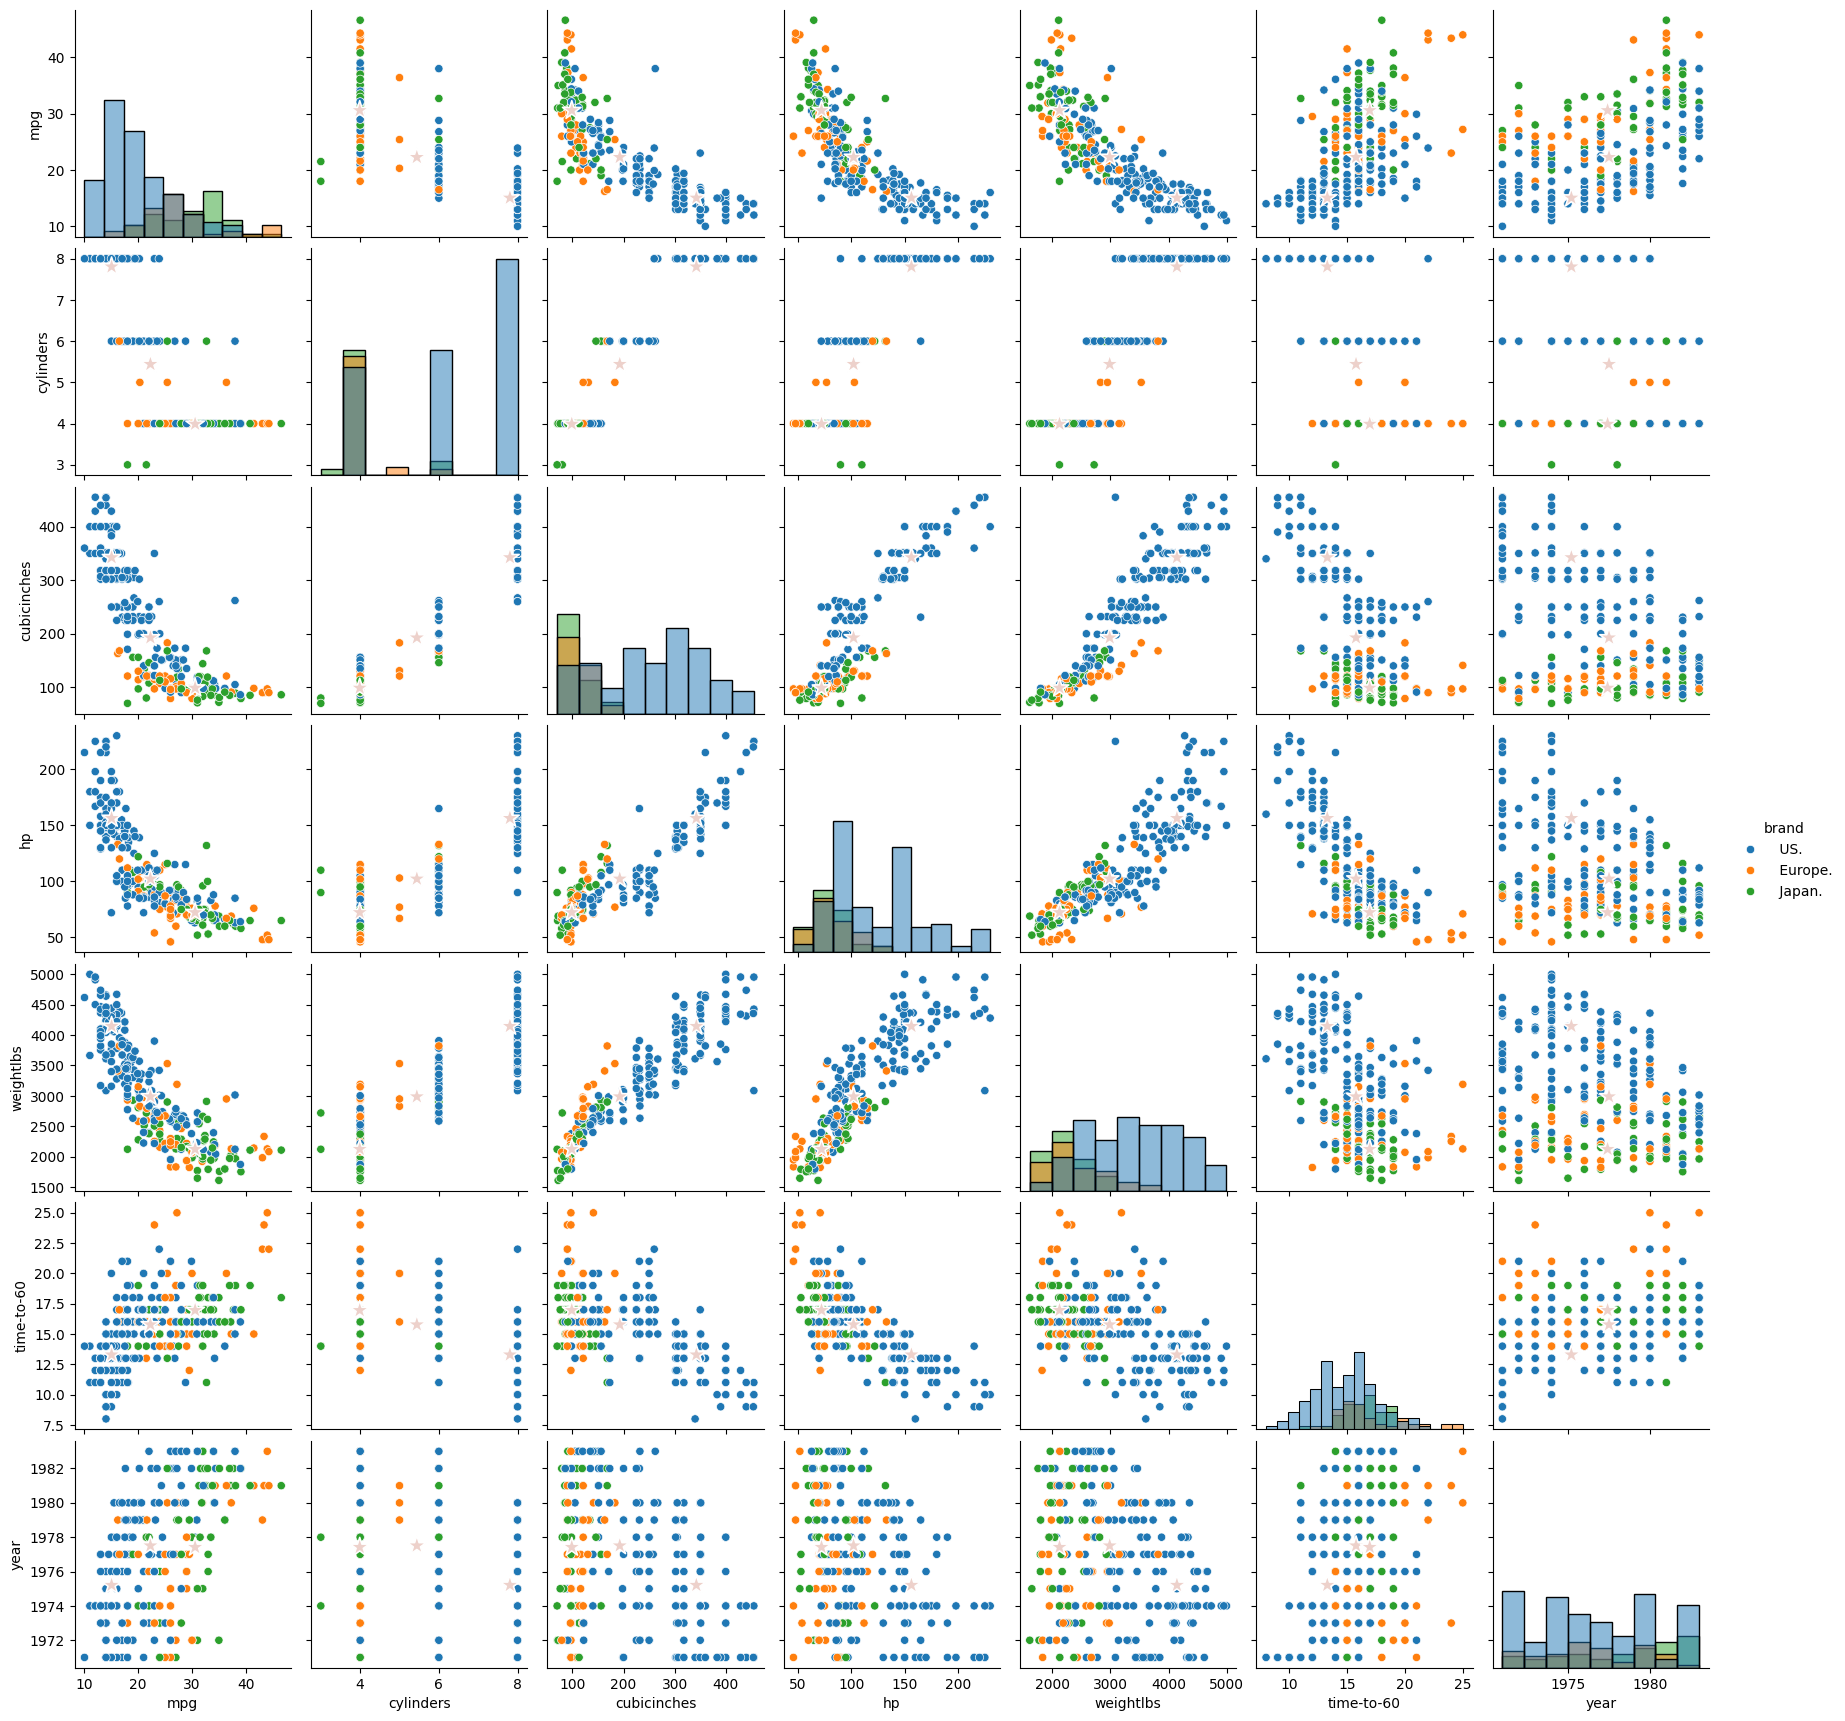

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
 
data_full = pd.read_csv('https://code.s3.yandex.net/datasets/cars_label.csv')
 
data = data_full.drop(columns=['brand'])

# Обучение модели
# < напишите код здесь >
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)


#data_full = pd.concat([data, centroids], ignore_index=True)

pairgrid = sns.pairplot(data_full, hue='brand', diag_kind='hist')
 
# Дополнительный слой для центроидов
# < напишите код здесь >

#  Сформируйте в дополнительной таблице новый столбец 'brand' в качестве заглушки
# < напишите код здесь >
centroids['brand'] = 4
# Построение графика
# < напишите код здесь >
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', palette='flag')

Найдите в датасете аномалии по признаку 'Profit'. Из ящика с усами возьмите список аномалий и запишите результат в переменной outliers.
Отфильтруйте исходный датафрейм функцией isin() и сохраните список объектов с аномалиями в переменной df_outliers.
Выведите количество аномалий (уже в прекоде).

Количество аномалий:  1881


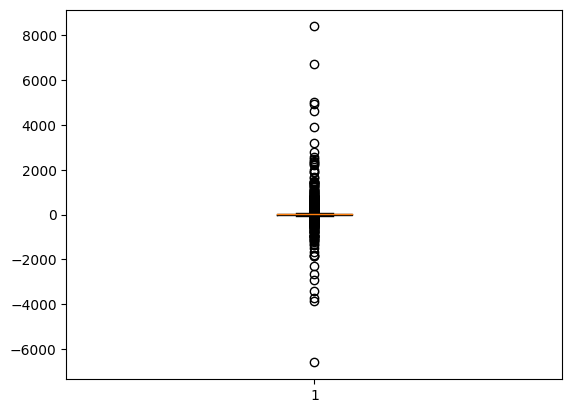

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://code.s3.yandex.net/datasets/sales.csv')

# < напишите код здесь >
boxplot = plt.boxplot(df['Profit'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])
df_outliers = df[df["Profit"].isin(outliers)] 

print("Количество аномалий: ", len(df_outliers))

Обучите модель изоляционного леса и вычислите количество аномалий по признакам:
продаж df['Sales'];
прибыли df['Profit'].
Определите, какие объекты — выбросы, и запишите их в переменной outliers.
Выведите длину списка (уже в прекоде).

In [4]:
import pandas as pd
from sklearn.ensemble import IsolationForest

df = pd.read_csv('https://code.s3.yandex.net/datasets/sales.csv')
data = df[['Sales', 'Profit']]

# < напишите код здесь >
isolation_forest = IsolationForest(n_estimators=100)
estimator = isolation_forest.fit_predict(data)
outliers=[i for i in estimator if i==-1]

print("Количество аномалий: ", len(outliers))

Количество аномалий:  1072


Моделью KNN и изоляционным лесом найдите выбросы в данных с переменными 'Sales' и 'Profit'. Выясните, сколько аномалий совпало. 
Напечатайте на экране два варианта количества выбросов и число совпавших аномалий. Формат вывода указан в прекоде.

In [1]:
import pandas as pd
from pyod.models.knn import KNN
from sklearn.ensemble import IsolationForest
import numpy as np

RANDOM_STATE = 42

df = pd.read_csv('https://code.s3.yandex.net/datasets/sales.csv')
data = df[['Sales', 'Profit']]
model = KNN()
estimation_knn = model.fit_predict(data)==1  # < напишите код здесь >
outliers_knn =estimation_knn.sum() # < напишите код здесь >
print("Количество аномалий (KNN): ", outliers_knn.sum())

# < напишите код здесь >
mi=IsolationForest(n_estimators=100,random_state=RANDOM_STATE)

estimation_iforest =mi.fit_predict(data)==-1 # < напишите код здесь >
outliers_iforest =estimation_iforest.sum() # < напишите код здесь >
print("Количество аномалий (изоляционный лес): ", outliers_iforest.sum())
s=(estimation_knn & estimation_iforest).sum() 
print("Совпало: ", s)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Количество аномалий (KNN):  1000
Количество аномалий (изоляционный лес):  1207
Совпало:  936
